In [222]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (22, 10)

Populating the interactive namespace from numpy and matplotlib


# <center>BCI</center>

# <center>Aufnahme</center>


<center>![title](img/chris_02.png)</center>

<center>![title](img/chris_01.png)</center>

![title](img/chris_03.jpg)

# <center>Preprocessing</center>

In [210]:
df = pd.read_csv("eeg.csv")
df

time  channel_1  channel_2  channel_3  channel_4     channel_5  \
0        0.033019        0.0        0.0        0.0        0.0  20621.173828   
1        0.033019        0.0        0.0        0.0        0.0  20620.171875   
2        0.033019        0.0        0.0        0.0        0.0  20621.029297   
3        0.033019        0.0        0.0        0.0        0.0  20620.958984   
4        0.033019        0.0        0.0        0.0        0.0  20616.667969   
5        0.034021        0.0        0.0        0.0        0.0  20613.378906   
6        0.034021        0.0        0.0        0.0        0.0  20614.595703   
7        0.034021        0.0        0.0        0.0        0.0  20618.384766   
8        0.034021        0.0        0.0        0.0        0.0  20618.812500   
9        0.034021        0.0        0.0        0.0        0.0  20617.955078   
10       0.034021        0.0        0.0        0.0        0.0  20616.525391   
11       0.034021        0.0        0.0        0.0        0.0  20616.240234   
12       0.034021        0.0        0.0        0.0        0.0  20617.740234   
13       0.034021        0.0        0.0        0.0        0.0  20616.525391   
14       0.034021        0.0        0.0        0.0        0.0  20615.882812   
15       0.034021        0.0        0.0        0.0        0.0  20613.736328   
16       0.035021        0.0        0.0        0.0        0.0  20613.808594   
17       0.035021        0.0        0.0        0.0        0.0  20617.312500   
18       0.035021        0.0        0.0        0.0        0.0  20617.240234   
19       0.035021        0.0        0.0        0.0        0.0  20613.951172   
20       0.035021        0.0        0.0        0.0        0.0  20612.449219   
21       0.035021        0.0        0.0        0.0        0.0  20613.593750   
22       0.035021        0.0        0.0        0.0        0.0  20613.736328   
23       0.035021        0.0        0.0        0.0        0.0  20616.667969   
24       0.035021        0.0        0.0        0.0        0.0  20618.097656   
25       0.036021        0.0        0.0        0.0        0.0  20618.384766   
26       0.036021        0.0        0.0        0.0        0.0  20618.884766   
27       0.036021        0.0        0.0        0.0        0.0  20620.958984   
28       0.036021        0.0        0.0        0.0        0.0  20620.886719   
29       0.036021        0.0        0.0        0.0        0.0  20619.171875   
...           ...        ...        ...        ...        ...           ...   
52642  421.818655        0.0        0.0        0.0        0.0  20529.509766   
52643  421.832666        0.0        0.0        0.0        0.0  20528.294922   
52644  421.846674        0.0        0.0        0.0        0.0  20528.152344   
52645  421.861684        0.0        0.0        0.0        0.0  20528.509766   
52646  421.876696        0.0        0.0        0.0        0.0  20528.580078   
52647  421.890706        0.0        0.0        0.0        0.0  20527.150391   
52648  421.903714        0.0        0.0        0.0        0.0  20527.365234   
52649  421.916725        0.0        0.0        0.0        0.0  20529.509766   
52650  421.930734        0.0        0.0        0.0        0.0  20532.583984   
52651  421.945746        0.0        0.0        0.0        0.0  20533.013672   
52652  421.959755        0.0        0.0        0.0        0.0  20531.583984   
52653  421.973764        0.0        0.0        0.0        0.0  20530.009766   
52654  421.987774        0.0        0.0        0.0        0.0  20530.939453   
52655  421.999783        0.0        0.0        0.0        0.0  20533.228516   
52656  422.013793        0.0        0.0        0.0        0.0  20536.160156   
52657  422.027804        0.0        0.0        0.0        0.0  20537.232422   
52658  422.042813        0.0        0.0        0.0        0.0  20536.087891   
52659  422.056823        0.0        0.0        0.0        0.0  20534.800781   
52660  422.071834        0.0        0.0        0.0        0.0  

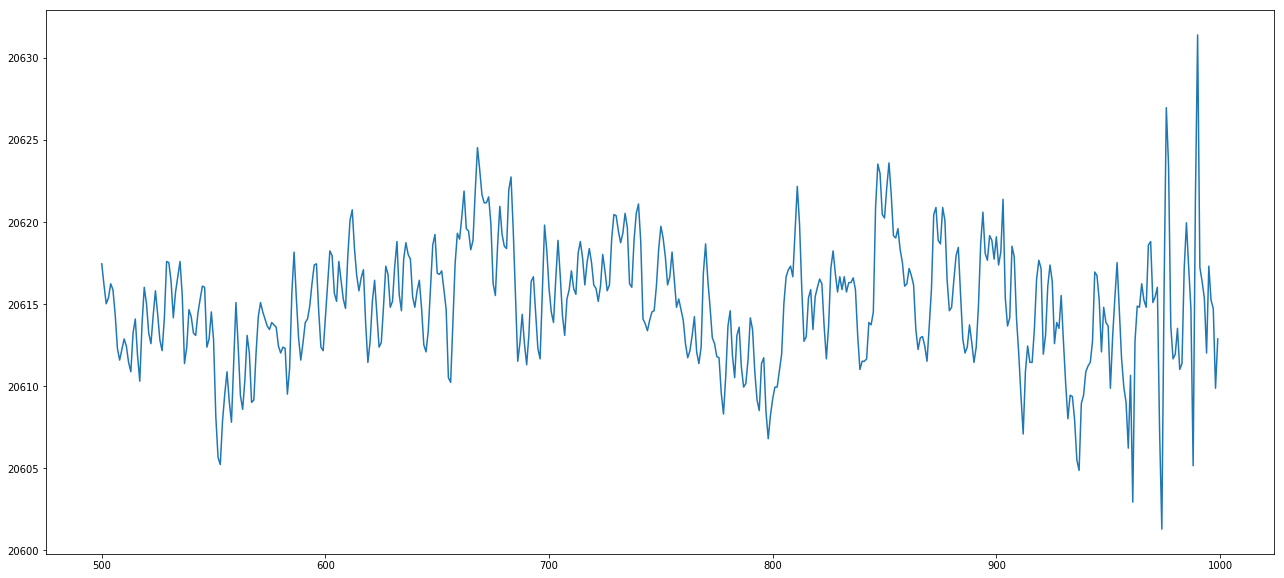

In [211]:
time_series = df.channel_5
plt.plot(time_series[500:1000])
plt.show()

### Lowpass

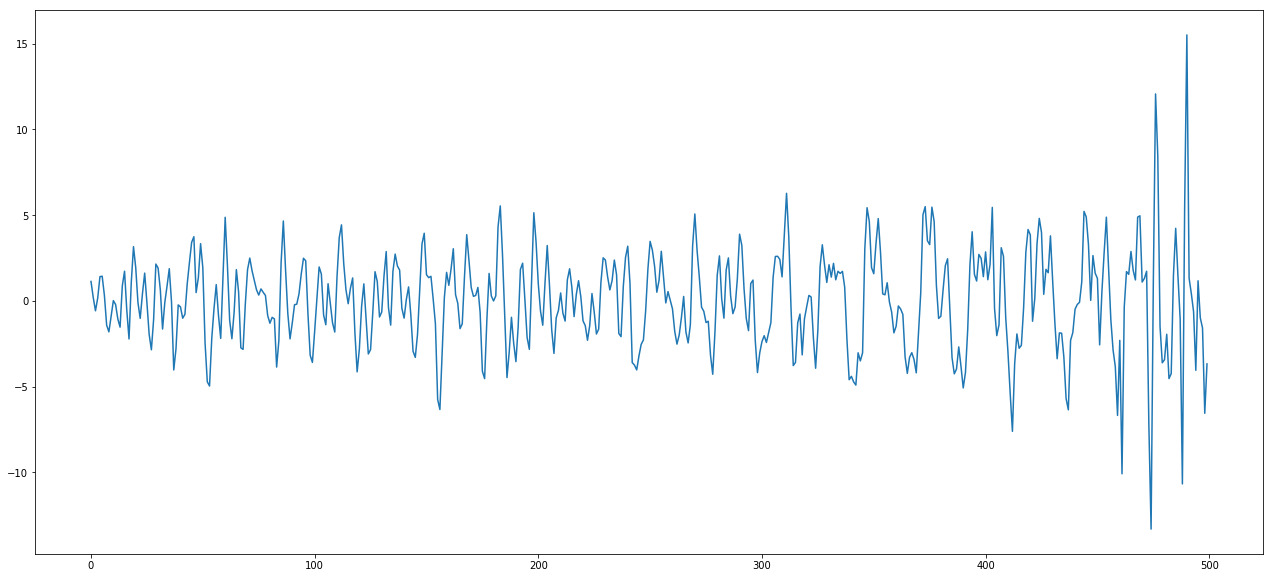

In [212]:
sample_rate = 256
nyq = 0.5 * sample_rate
b, a = signal.butter(8, (8/nyq), "high")
time_series_lowpass = signal.filtfilt(b, a, time_series)
plt.plot(time_series_lowpass[500:1000])
plt.show()

### Highpass

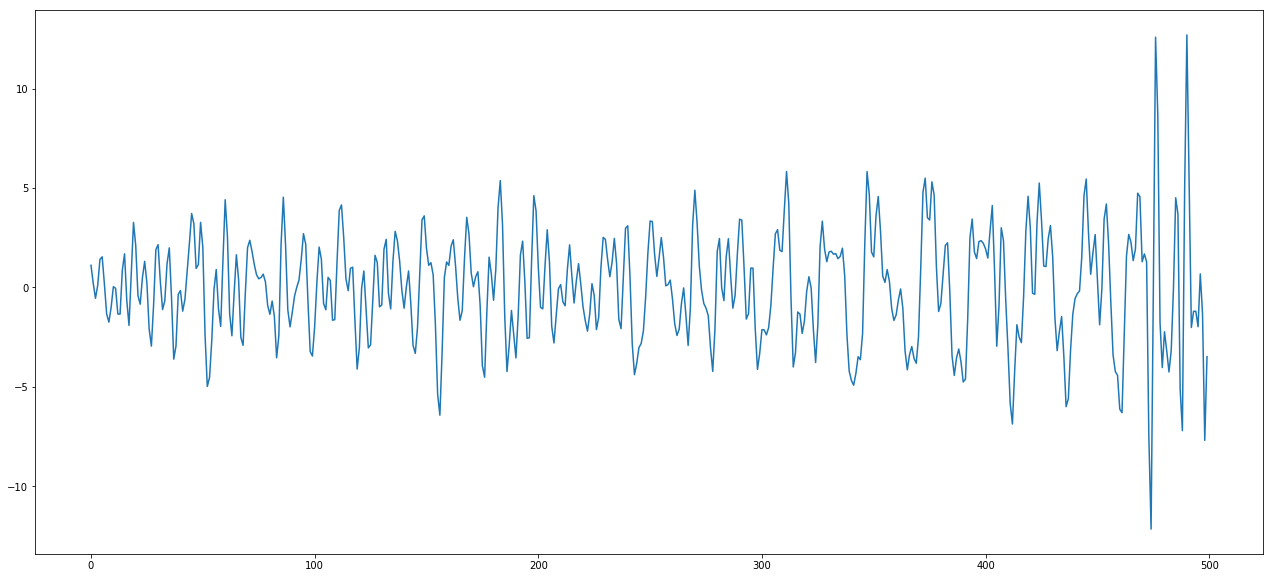

In [213]:
b, a = signal.butter(8, (80/nyq), "low")
time_series_lowpass_highpass = signal.filtfilt(b, a, time_series_lowpass)
plt.plot(time_series_lowpass_highpass[500:1000])
plt.show()

### Notch

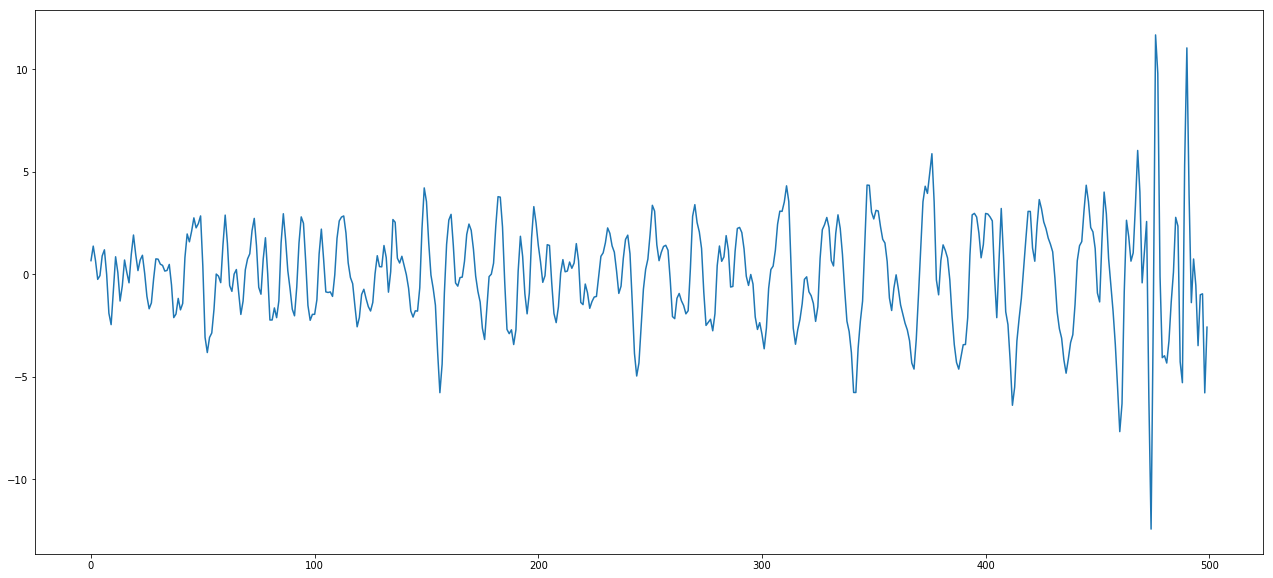

In [214]:
b, a = signal.iirnotch((50/nyq), 30.0)
time_series_bandstop = signal.filtfilt(b, a, time_series_lowpass_highpass)
plt.plot(time_series_bandstop[500:1000])
plt.show()

### Smooth

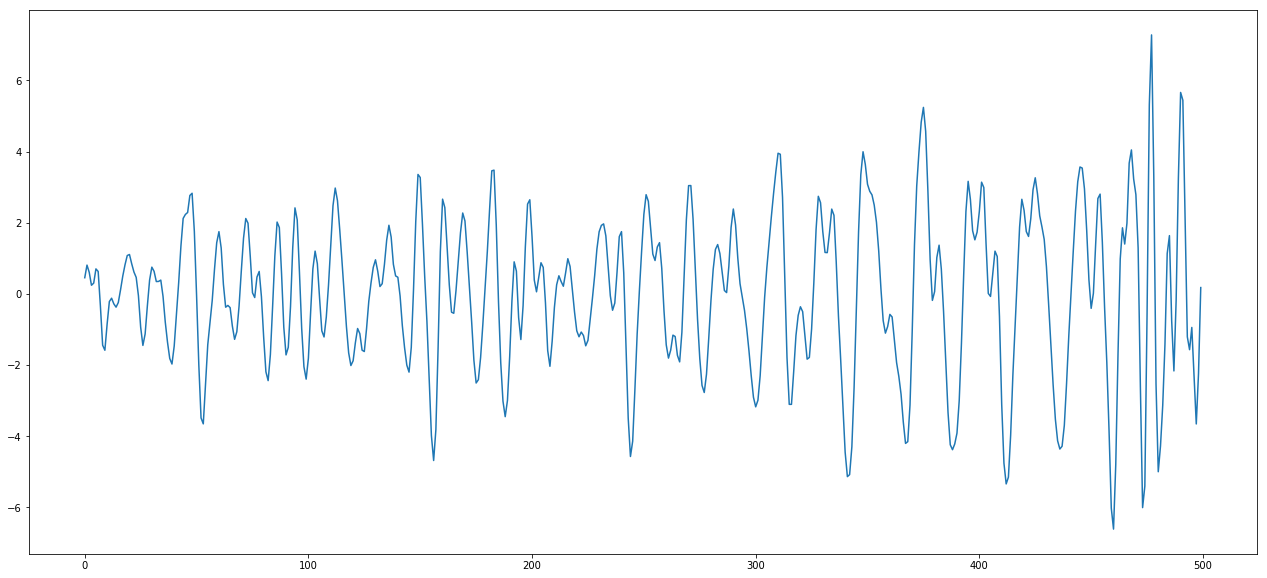

In [215]:
time_series_smooth = signal.savgol_filter(time_series_bandstop, 7, 2)
plt.plot(time_series_smooth[500:1000])
plt.show()

### Subsampling

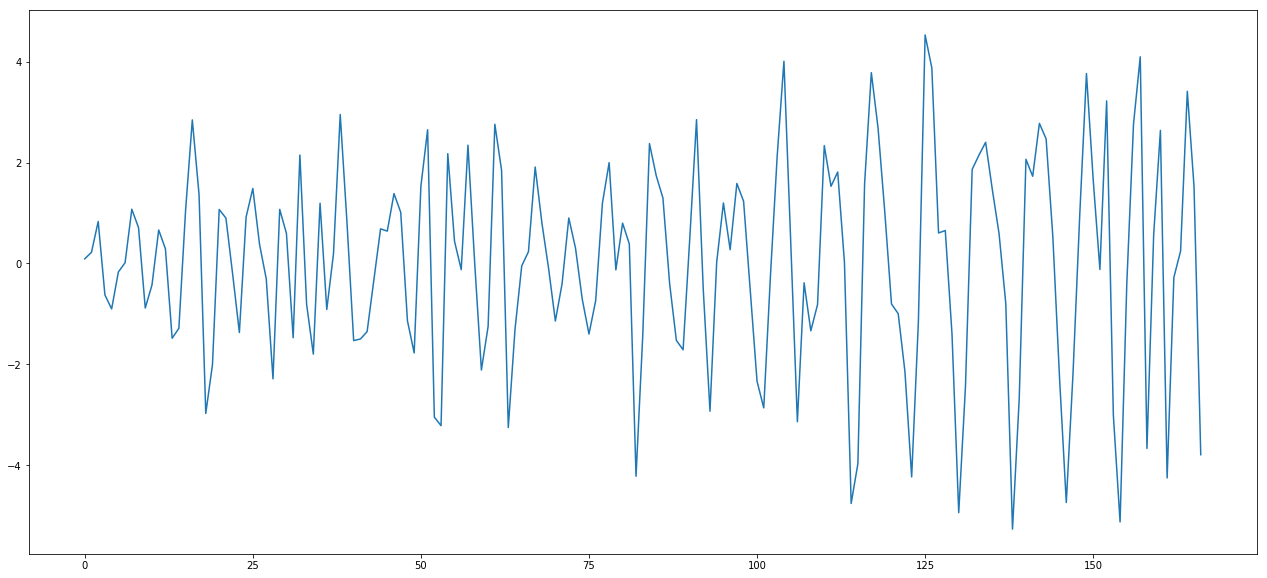

In [216]:
subsampling = 3
time_series_subsample = signal.decimate(time_series_smooth, subsampling)
plt.plot(time_series_subsample[int(500/subsampling):int(1000/subsampling)])
plt.show()

### Normalisation

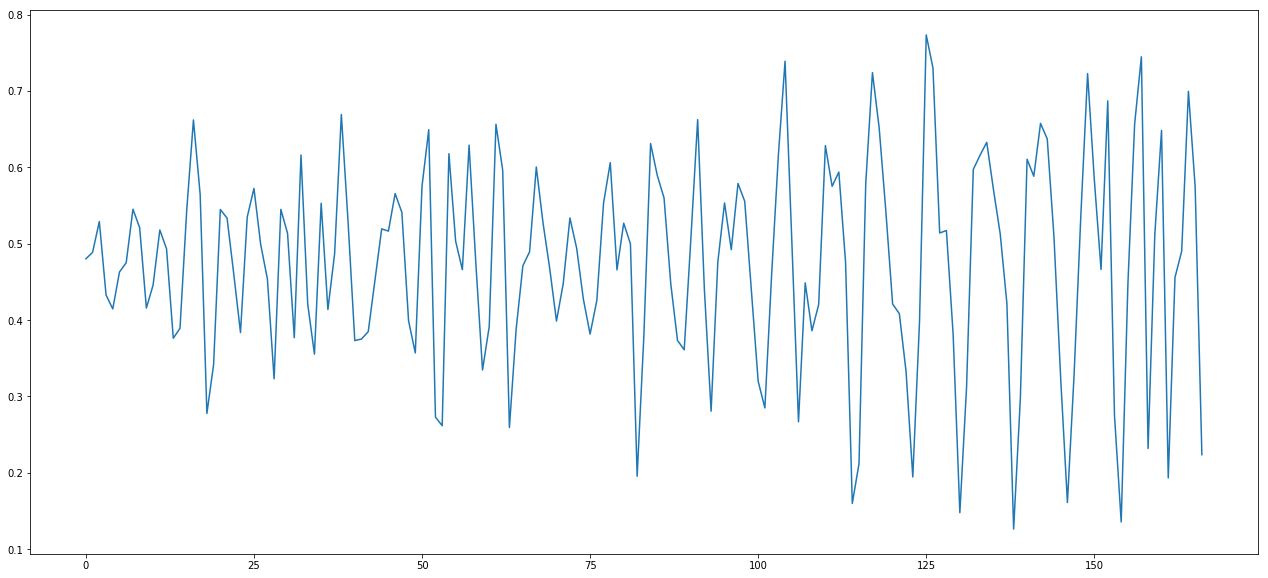

In [217]:
x = time_series_subsample
time_series_norm = (x-min(x))/(max(x)-min(x))
plt.plot(time_series_norm[int(500/subsampling):int(1000/subsampling)])
plt.show()

# <center>Darstellung von Time Series Daten</center>

## <center>Time-Domain</center>

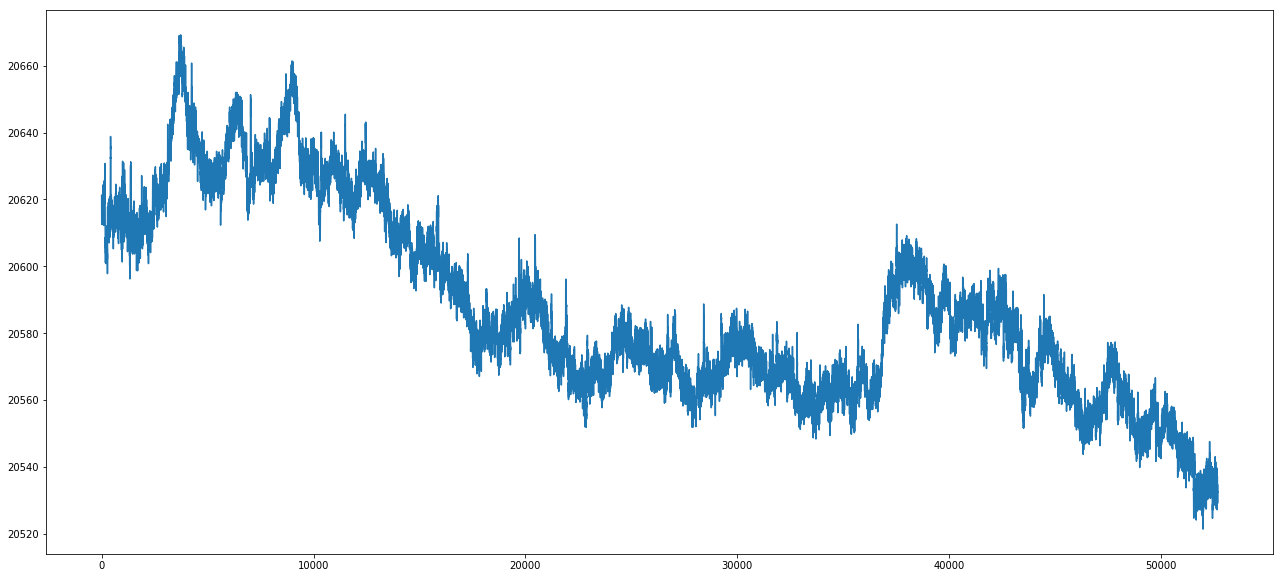

In [218]:
plt.plot(time_series)
plt.show()

## <center>Frequence-Domain</center>

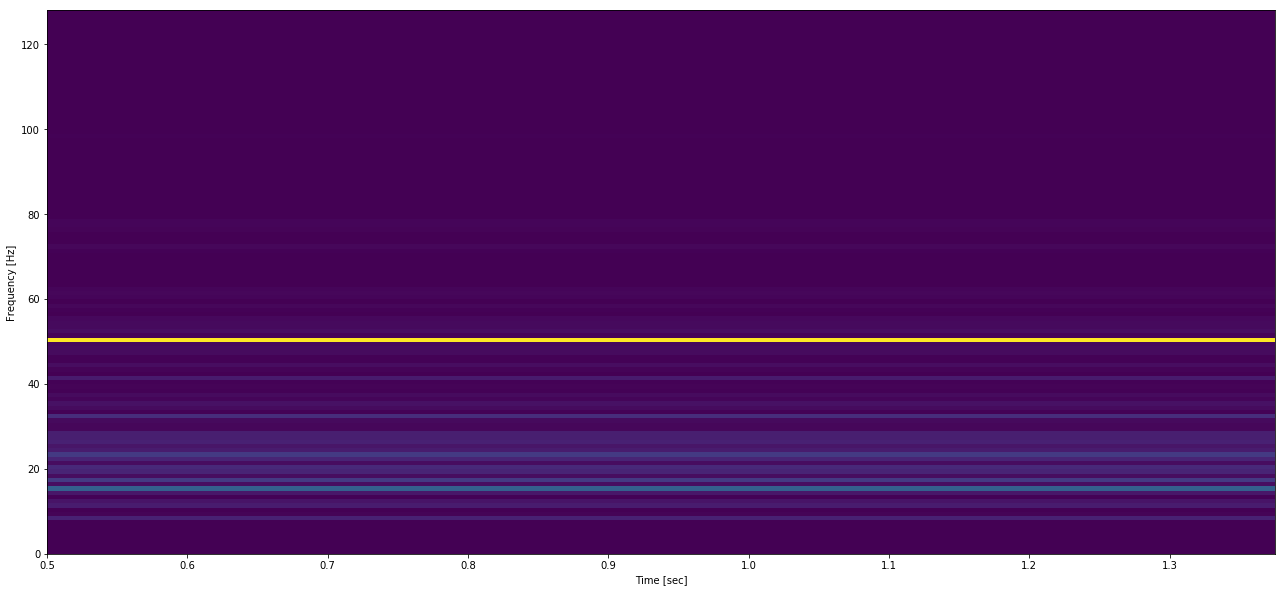

In [224]:
f, t, Sxx = signal.spectrogram(time_series_lowpass[500:1000], 256)
#nperseg=32
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

## Time Frequence-Domain

- STFT
- Wavelet-Transformation

<center>![title](img/wavelet.png)</center>

## Wavelet-Transformation

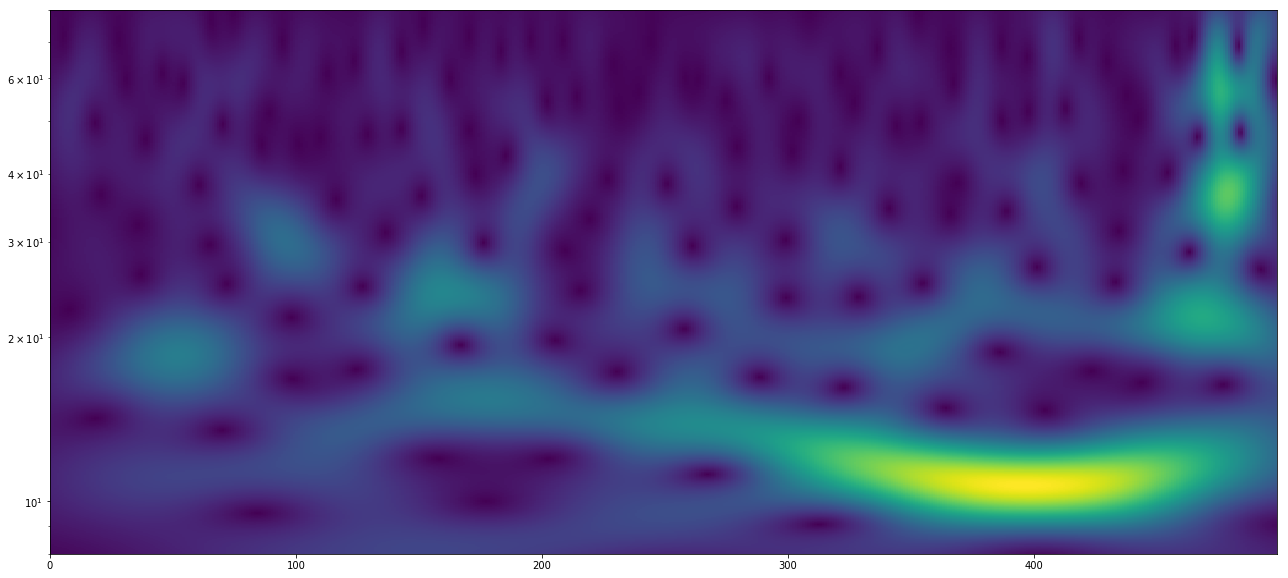

In [220]:
from obspy.signal.tf_misfit import cwt
from obspy.imaging.cm import obspy_sequential
fmin = 8
fmax = 80
scalogram = cwt(time_series_bandstop[500:1000], dt=(1/256), w0=8, fmin=fmin, fmax=fmax, nf=500)
x, y = np.meshgrid(range(500),np.logspace(np.log10(fmin), np.log10(fmax), scalogram.shape[0]))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.pcolormesh(x, y, np.abs(scalogram))
ax.set_yscale('log')
plt.show()

# <center>Neuronale Netze</center>

## CNN
<center>![title](img/convolve2d.png)</center>

#### Anästze:
- Conv1D + Time Domain
- Conv1D + Frequence Domain
- Conv2D + Frequence-Time Domain

## RNN
<center>![title](img/rnn.png)</center>

- LSTM + Time Domain
- LSTM + Frequence-Time Domain (Spectorgram)
- LSTM + Frequence-Time Domain (Scalogram)

## Multi-Modell

<center>![title](img/multi_modell.png)</center>


# Tools
#### Preprocessing
- Numpy, Pandas, Scipy
- MNE Python
- Obspy (Wavelets)
- Matlab

#### Neuronale Netze
- Keras
- Tensorflow

#### Rechner
- GPU Support
- Daenarys